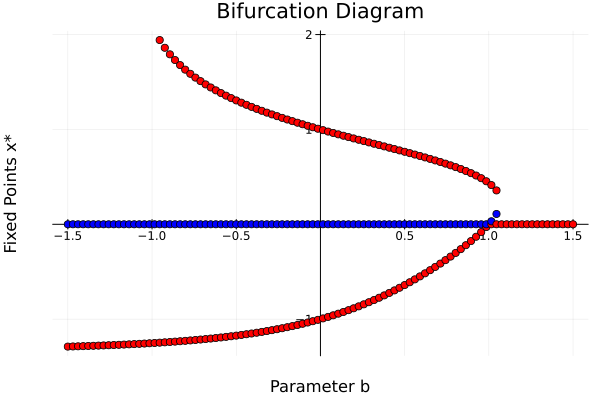

In [1]:
using Plots
using Roots

function x_dot(x, b)
    a = 1.0
    return x * (1 - x^2) - a * (1 - exp(-b * x))
end

function fx_dot(x, b)
    a = 1.0
    return 1 - 3*x^2 - a*b*exp(-b*x)
end

bs = range(-1.5, 1.5, length=100)

p1 = plot(framestyle=:origin, legend=false, xlabel="Parameter b", ylabel="Fixed Points x*", title="Bifurcation Diagram")

for b in bs
        roots = find_zeros(x -> x_dot(x, b), -2, 2)
    for r in roots
        stability = fx_dot(r, b)
        color = stability < 0 ? "#FF0000" : stability > 0 ? "#0000FF" : "#FFFF00"
        scatter!(p1, [b], [r], color=color, label=false)
        #red is unstable, blue is stable.
    end
end

# Display the plot
display(p1)


In [1]:
using Plots
using Roots

function fixed_point_equation(x, r)
    return r*x - log(1 + x)
end

function jacobian(x, r)
    return r - 1/(1 + x)
end

r_values = range(-2, 2, length=1000)
x_stable = []
x_unstable = []
r_critical = []

for r in r_values
    x_root = find_zero(x -> fixed_point_equation(x, r), 0, Order1()) # Initial guess at 0
    J = jacobian(x_root, r)
    y
    if J < 0
        push!(x_stable, (r, x_root))
    else
        push!(x_unstable, (r, x_root))
    end
    
    if abs(J) < 1e-3 
        push!(r_critical, r)
    end
end

plot(legend=:topright)
scatter([x[1] for x in x_stable], [x[2] for x in x_stable], label="Stable", color="blue")
scatter([x[1] for x in x_unstable], [x[2] for x in x_unstable], label="Unstable", color="red")
vline!(r_critical, label="Critical r", linestyle=:dash, color="green")
xlabel!("Parameter r")
ylabel!("Fixed Points x*")
title!("Bifurcation Diagram")


LoadError: UndefVarError: `y` not defined

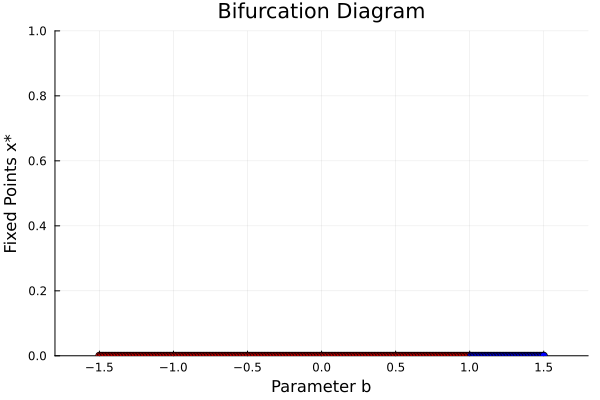

In [3]:
using Roots 
using Plots  

a = 1.0  

x_dot(x, b) = x * (1 - x^2) - a * (1 - exp(-b * x))
fx_dot(x, b) = 1 - 3*x^2 - a*b*exp(-b*x)

p1 = plot(title="Bifurcation Diagram", xlabel="Parameter b", ylabel="Fixed Points x*", legend=false)

b_values = range(-1.5, 1.5, length=300)

all_points = []

for b in b_values

    f(x) = x_dot(x, b)
    x_guess = 0.0
    
    try
        r = find_zero(f, x_guess, Roots.Secant(), verbose=false)
        lin_test = fx_dot(r, b)
        push!(all_points, (b, r))

        if lin_test < 0
            scatter!(p1, [b], [r], color="blue")  # Stable
        elseif lin_test > 0
            scatter!(p1, [b], [r], color="red")  # Unstable
        end
    catch e
        continue
    end
end

b_min, b_max = extrema(map(p -> p[1], all_points))
x_min, x_max = extrema(map(p -> p[2], all_points))

# Optionally, adjust the limits to add some padding
padding = 0.1
b_range = b_max - b_min
x_range = x_max - x_min
xlims!(b_min - padding * b_range, b_max + padding * b_range)
ylims!(x_min - padding * x_range, x_max + padding * x_range)

display(p1)




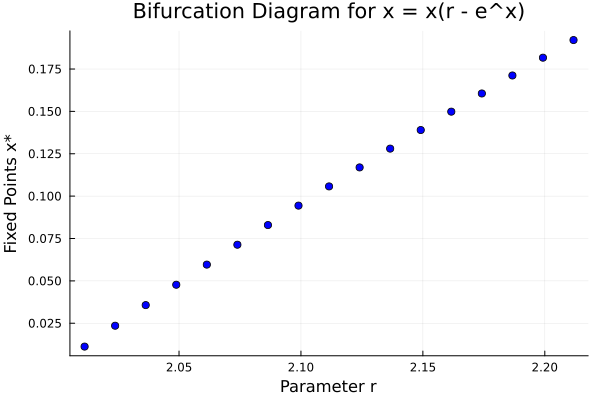

In [4]:
using Roots  
using Plots 

f(x, r) = x * (1 - r + exp(x))

p1 = plot(title="Bifurcation Diagram for x = x(r - e^x)", xlabel="Parameter r", ylabel="Fixed Points x*", legend=false)

r_values = range(-2.5, 2.5, length=400)

for r in r_values
    g(x) = f(x, r)
    
    try
        non_zero_root = find_zero(g, 0.1, Roots.Secant(), verbose=false) 
        
        if abs(non_zero_root) > 1e-5
            scatter!(p1, [r], [non_zero_root], color="blue")
        end
    catch e
        continue
    end
end

display(p1)


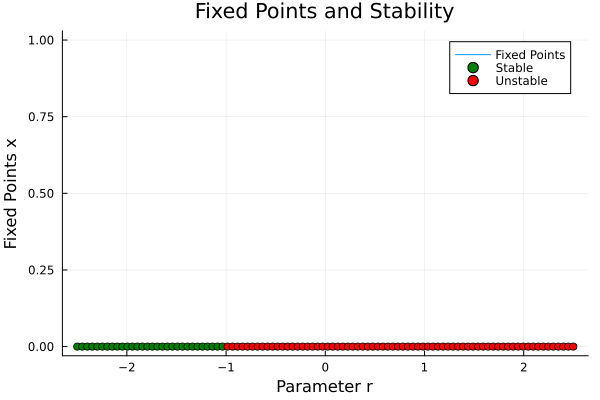

In [5]:
using Roots  
using Plots 

x_dot(x, r) = x + (r*x)/(1 + x^2)

dx_dot_dx(x, r) = 1 + r/(1 + x^2) - (2*r*x^2)/(1 + x^2)^2

# Range of r values to explore
r_values = range(-2.5, 2.5, length=100)

fixed_points = []
stabilities = []

for r in r_values
    fixed_point = find_zero(x -> x_dot(x, r), 0)  # Initial guess is 0
    stability = dx_dot_dx(fixed_point, r)
    
    push!(fixed_points, fixed_point)
    push!(stabilities, stability)
end

# Plotting
p = plot(r_values, fixed_points, label="Fixed Points", title="Fixed Points and Stability", xlabel="Parameter r", ylabel="Fixed Points x")

stable_r = [r_values[i] for i in 1:length(stabilities) if stabilities[i] < 0]
unstable_r = [r_values[i] for i in 1:length(stabilities) if stabilities[i] > 0]
scatter!(stable_r, zeros(length(stable_r)), label="Stable", color="green")
scatter!(unstable_r, zeros(length(unstable_r)), label="Unstable", color="red")

display(p)


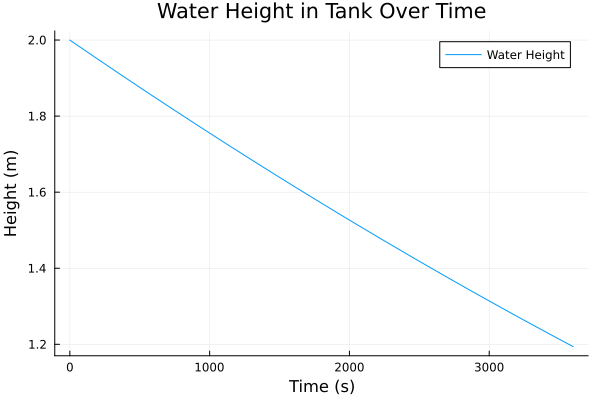

In [9]:
using Plots

g = 9.81  # m/s^2

valve_diameter_m = 0.5 * 0.0254  # Half inch in meters
Ah = π * (valve_diameter_m / 2)^2

tank_radius_m = 1.0  
A = π * tank_radius_m^2 


h0 = 2.0  


dt = 1.0 
time_total = 3600  


h = h0
time = 0.0
heights = [h0]
times = [0.0]


while h > 0 && time < time_total
    dh = -(Ah / A) * sqrt(2 * g * h) * dt
    h += dh
    time += dt
    push!(heights, max(h, 0))  # Ensure height doesn't go negative
    push!(times, time)
end


plot(times, heights, label="Water Height", xlabel="Time (s)", ylabel="Height (m)", title="Water Height in Tank Over Time")
